In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
def flatten_list(nested_list):
    """
    Flattens a nested list using list comprehension.

    Args:
    
        nested_list (list): The nested list to be flattened.

    Returns:
        list: A flattened version of the input list.
    """
    return [item for sublist in nested_list for item in sublist]

In [78]:
mask1.shape, mask2.shape

((34, 64, 64), (34, 64, 64))

In [79]:
mask = np.array([mask1, mask2])
mask.shape

(2, 34, 64, 64)

In [81]:
mask.sum(axis=0).shape

(34, 64, 64)

In [77]:
forb.shape

(25, 2)

In [102]:
forb

array([['/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts/sector0005/tess-asteroid-cuts_64x64_s0005-2-3_V22.0_orb1_bkgF_1054.npz',
        '/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts/sector0005/tess-asteroid-cuts_64x64_s0005-2-3_V22.0_orb2_bkgF_1054.npz'],
       ['/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts/sector0005/tess-asteroid-cuts_64x64_s0005-2-3_V22.0_orb1_bkgF_1114.npz',
        '/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts/sector0005/tess-asteroid-cuts_64x64_s0005-2-3_V22.0_orb2_bkgF_1114.npz'],
       ['/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts/sector0005/tess-asteroid-cuts_64x64_s0005-2-3_V22.0_orb1_bkgF_1174.npz',
        '/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts/sector0005/tess-asteroid-cuts_64x64_s0005-2-3_V22.0_orb2_bkgF_1174.npz'],
       ['/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts/sector0005/te

In [103]:
sector = 5
camera = 2
ccd = 3

local = "/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/asteroidcuts"
adapt = "/explore/nobackup/projects/asteroid/data/asteroidcuts"

forb = [sorted(glob(
    f"{local}/sector{sector:04}/tess-asteroid-cuts_*_s{sector:04}-{camera}-{ccd}*orb{k}*.npz"
)) for k in range(1,5)]
forb = np.asarray([x for x in forb if x != []]).T

cube_mask_sum = []
# cube_flux = []
cube_row = []
cube_col = []

for fs in forb:
    mask_aux = []
    for f in fs:
        data = np.load(f)
        mask_aux.append(data["mask"].astype(bool).astype(int).sum(axis=1))

    cube_col.extend(data["column"])
    cube_row.extend(data["row"])
    # cube_flux.append(data["flux"])
    cube_mask_sum.append(np.array(mask_aux).sum(axis=0))

cube_mask_sum = flatten_list(cube_mask_sum)
# cube_flux = flatten_list(cube_flux)

cube_row2d = []
cube_col2d = []

for r, c in zip(cube_row, cube_col):
    _row2d, _col2d = np.mgrid[r : r + 64, c : c + 64]
    cube_row2d.append(_row2d)
    cube_col2d.append(_col2d)

cube_mask_sum = np.array(cube_mask_sum)
cube_row2d = np.array(cube_row2d)
cube_col2d = np.array(cube_col2d)

print(cube_mask_sum.shape, cube_row2d.shape, cube_col2d.shape)

(1156, 64, 64) (1156, 64, 64) (1156, 64, 64)


In [104]:
for k in data.keys():
    print(k, type(data[k]), data[k].dtype)

flux <class 'numpy.ndarray'> float32
column <class 'numpy.ndarray'> int16
row <class 'numpy.ndarray'> int16
mask <class 'numpy.ndarray'> int16
time <class 'numpy.ndarray'> float64
cadenceno <class 'numpy.ndarray'> int16
has_comet <class 'numpy.ndarray'> bool


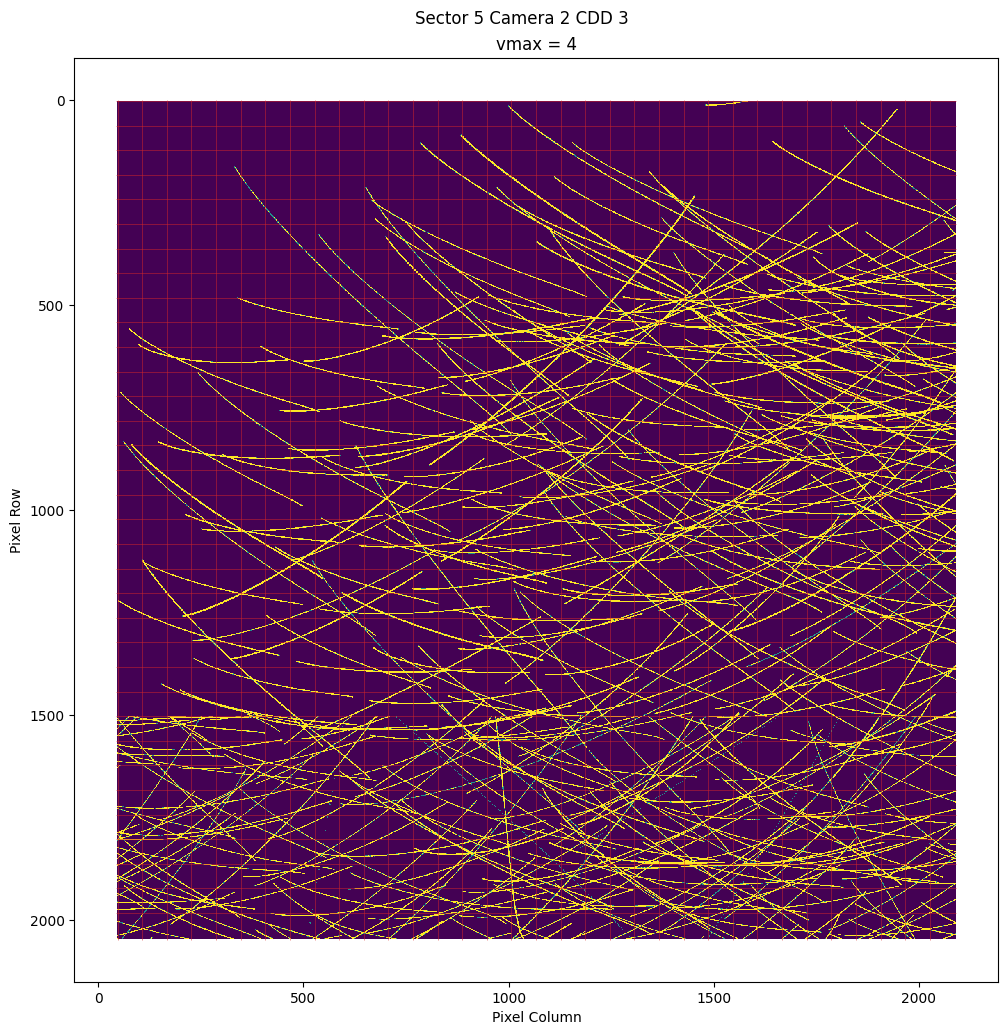

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
fig.suptitle(f"Sector {sector} Camera {camera} CDD {ccd}", y=0.92)

for k in range(len(cube_mask_sum)):
    ax.set_title(f"vmax = {4}")
    ax.pcolormesh(
        cube_col2d[k],
        cube_row2d[k],
        cube_mask_sum[k],
        cmap="viridis",
        vmin=0,
        vmax=2,
    )

# ax.set_ylim(0,1000)
ax.set_aspect('equal', 'box')
ax.invert_yaxis()
ax.set_xlabel("Pixel Column")
ax.set_ylabel("Pixel Row")

ax.vlines(np.unique(cube_col), 0, 2048, colors="tab:red", alpha=0.7, lw=0.5)
ax.hlines(np.unique(cube_row), 44, 2092, colors="tab:red", alpha=0.7, lw=0.5)

# plt.save(
#     f"home/jimartin/tess/tess-asteroid-ml/data/figures/asteroid_mask_s{sector:04}-{camera}-{ccd}.png",
#     bbox_inches="tight",
# )
plt.show()


In [66]:
import socket

In [67]:
socket.gethostname()

'Jorges-M1-Max.local'